## IMAGE CLASSIFICATION ( CLOUDY / NON CLOUDY IMAGES )
### IMAGE TYPE - INDIAN / ASIAN LANDSCAPE with the location of my college highlighted

### Lets import the necesssary libraries

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

### Now let's have a look at one of the images and understand the data we are about to use.

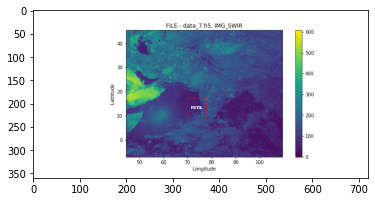

In [3]:
img = image.load_img('/content/drive/My Drive/basedata/training/noncloud/6.png')
plt.imshow(img)
plt.show()

### The above image is of a ' Non Cloudy ' type. The image is made up of various pixels and we need to 
### identify the arrangement of these pixels in order to pass them to our convolutional network.

In [4]:
cv2.imread('/content/drive/My Drive/basedata/training/noncloud/6.png').shape

(360, 720, 3)

* From the result of the code above we come to know that our picture has 3-channels Red,Green,Blue.
* We now know that our image has a Height of 360 pixels, Breath of 720 pixels and Depth of 3 channels.

# Lets create our Train and Validation Dataset

In [5]:
train = ImageDataGenerator(rescale=1/255)

validation = ImageDataGenerator(rescale=1/255)

## Different Images may have different sizes, hence, Let's Normalize them.

In [6]:
train_data = train.flow_from_directory('/content/drive/My Drive/basedata/training',
                                      target_size=(350,700),
                                       batch_size=1,
                                      class_mode='binary')

validation_data = train.flow_from_directory('/content/drive/My Drive/basedata/validation',
                                      target_size=(350,700),
                                       batch_size=1,
                                      class_mode='binary')

Found 45 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


## Creating a Model upon which we would train our dataset.

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(350,700,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')   
                                    ])

## Now let's compile and Train our Model.

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [9]:
model_fit = model.fit(train_data,
                      steps_per_epoch=3,
                     epochs=15,
                      validation_data = validation_data)

Epoch 1/15
3/3 [==============================] - 13s 4s/step - loss: 87.9063 - accuracy: 0.0000e+00 - val_loss: 11.9288 - val_accuracy: 0.6000
Epoch 2/15
3/3 [==============================] - 4s 1s/step - loss: 11.6040 - accuracy: 0.3333 - val_loss: 5.2334 - val_accuracy: 0.6000
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 7.9790 - accuracy: 0.0000e+00 - val_loss: 1.6130 - val_accuracy: 0.6000
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 1.5356 - accuracy: 0.3333 - val_loss: 1.6477 - val_accuracy: 0.6000
Epoch 5/15
3/3 [==============================] - 4s 1s/step - loss: 1.7060 - accuracy: 0.3333 - val_loss: 2.5768 - val_accuracy: 0.6000
Epoch 6/15
3/3 [==============================] - 4s 1s/step - loss: 2.3321e-04 - accuracy: 1.0000 - val_loss: 3.2440 - val_accuracy: 0.6000
Epoch 7/15
3/3 [==============================] - 4s 1s/step - loss: 2.3139 - accuracy: 0.6667 - val_loss: 1.1280 - val_accuracy: 0.4667
Epoch 8/15
3/3 [=========

In [10]:
validation_data.class_indices

{'cloud': 0, 'noncloud': 1}

### We have successfully trained our Model and Now e need to test it on our testing Dataset.
### As we have only two classes, we can clasify the cloudy images as " 0 " and the Non cloudy images as " 1 "

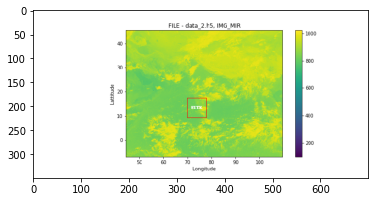

The image is Cloudy


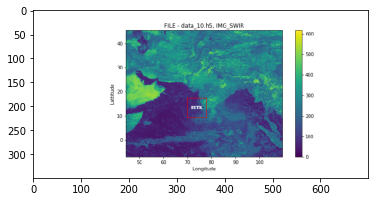

The image is Non Cloudy


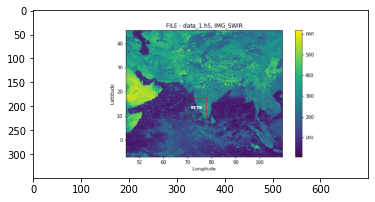

The image is Non Cloudy


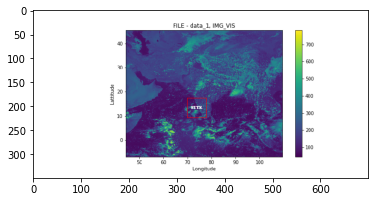

The image is Non Cloudy


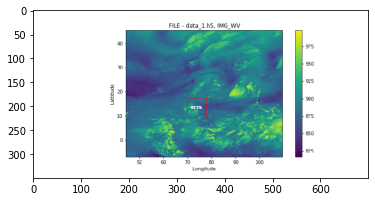

The image is Cloudy


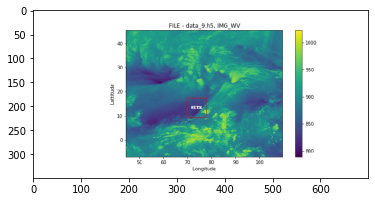

The image is Cloudy


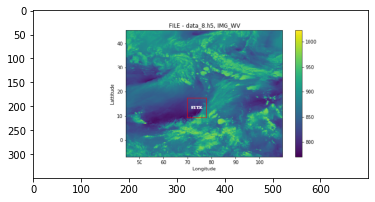

The image is Cloudy


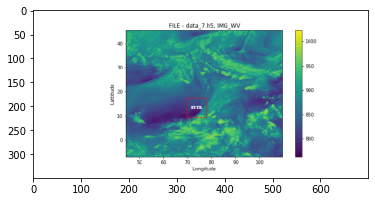

The image is Cloudy


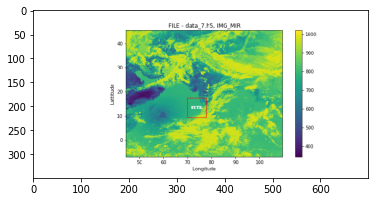

The image is Cloudy


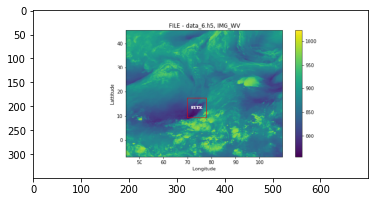

The image is Cloudy


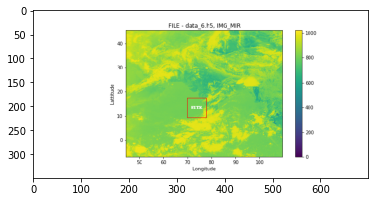

The image is Cloudy


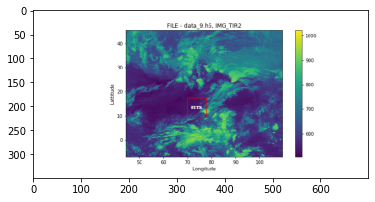

The image is Cloudy


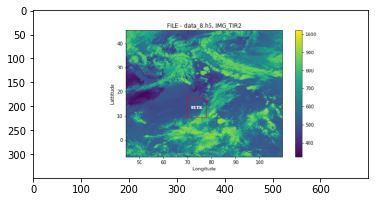

The image is Cloudy


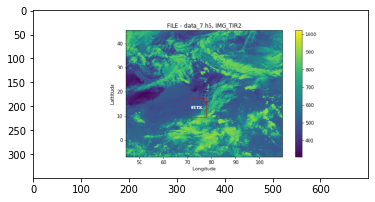

The image is Cloudy


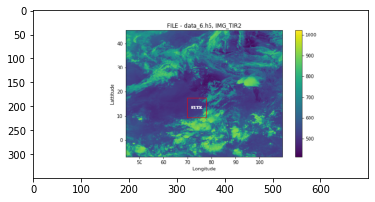

The image is Cloudy


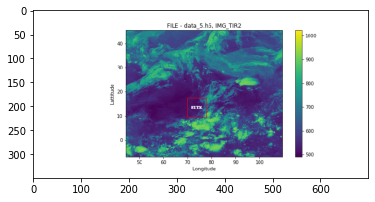

The image is Cloudy


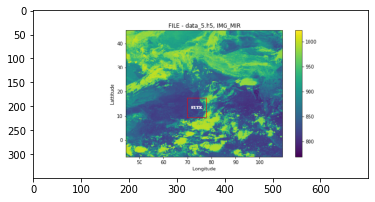

The image is Cloudy


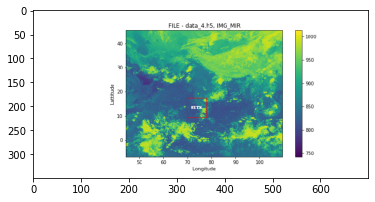

The image is Cloudy


In [11]:
dir_path = '/content/drive/My Drive/basedata/testing'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'/' + i,target_size=(350,700))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val==0:
        print("The image is Cloudy")
    else:
        print("The image is Non Cloudy")


# Let's Summarize :

* The images in the test dataset were classified as Cloudy and Non Cloudy. 
* All the images were classified correctly !!! 
* As all the images were precisely classified, we can say that our model showed 100 % accuracy on the 
  test dataset.

### An important aspect to note here is that even though our model showed 100 % 
### accuracy on the test data, this might not be the case always. This high level 
### of accuracy was obtained probably because of the low number of samples in 
### our dataset. There is a high chance that the accuracy of the Model would decrese
### with increase in the number of data samples.    